# QUESTION 4

Use the breast cancer dataset available in sklearn package. You are required to show the steps in loading the data set, perform exploratory data analysis, identify the algorithm (from what has been covered in the seminars) suitable for detecting breast cancer. Present appropriate performance metrics

## Exploration of the Data

From the problem statement, we are tasked with detecting breast cancer type. 

Therefore, this is a **classification** problem that we are attempting to solve.

To begin, let's load the dataset

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)

Let's display the dataset for the first few rows to get a sense of it

In [2]:
import pandas as pd

pd.set_option("display.max_columns", None)

In [3]:
data["frame"].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data["frame"].shape

(569, 31)

In [5]:
data["frame"].dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

From the above dataset, there is a target column in it, indicating a target variable that's required for supervised learning classification. The shape tells us that there are `569` data points and `30` features of continuous values.

In this case, we will use the supervised learning classification algorithms to solve the problem.

Let's get a sense of the type of the different classes and respective target values

In [6]:
pd.DataFrame(data["target_names"], columns=['Cancer Type']).transpose()

,0,1
Cancer Type,malignant,benign


The target values are only `0` and `1`, indicating a **binary** classification problem.

In [7]:
X = data["data"]
y = data["target"]

Let's find any missing data,

In [8]:
data["frame"][data["frame"].isnull().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [9]:
data["frame"].isnull().values.any()

False

We find that there are no missing values to be cleaned in the given dataset.

Let's display some descriptive statistics to get a sense of the dataset variance for each of the features,

In [10]:
X_stats = X.describe()
X_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


To get a better breakdown based on the target values, we will use box-plot for each features,

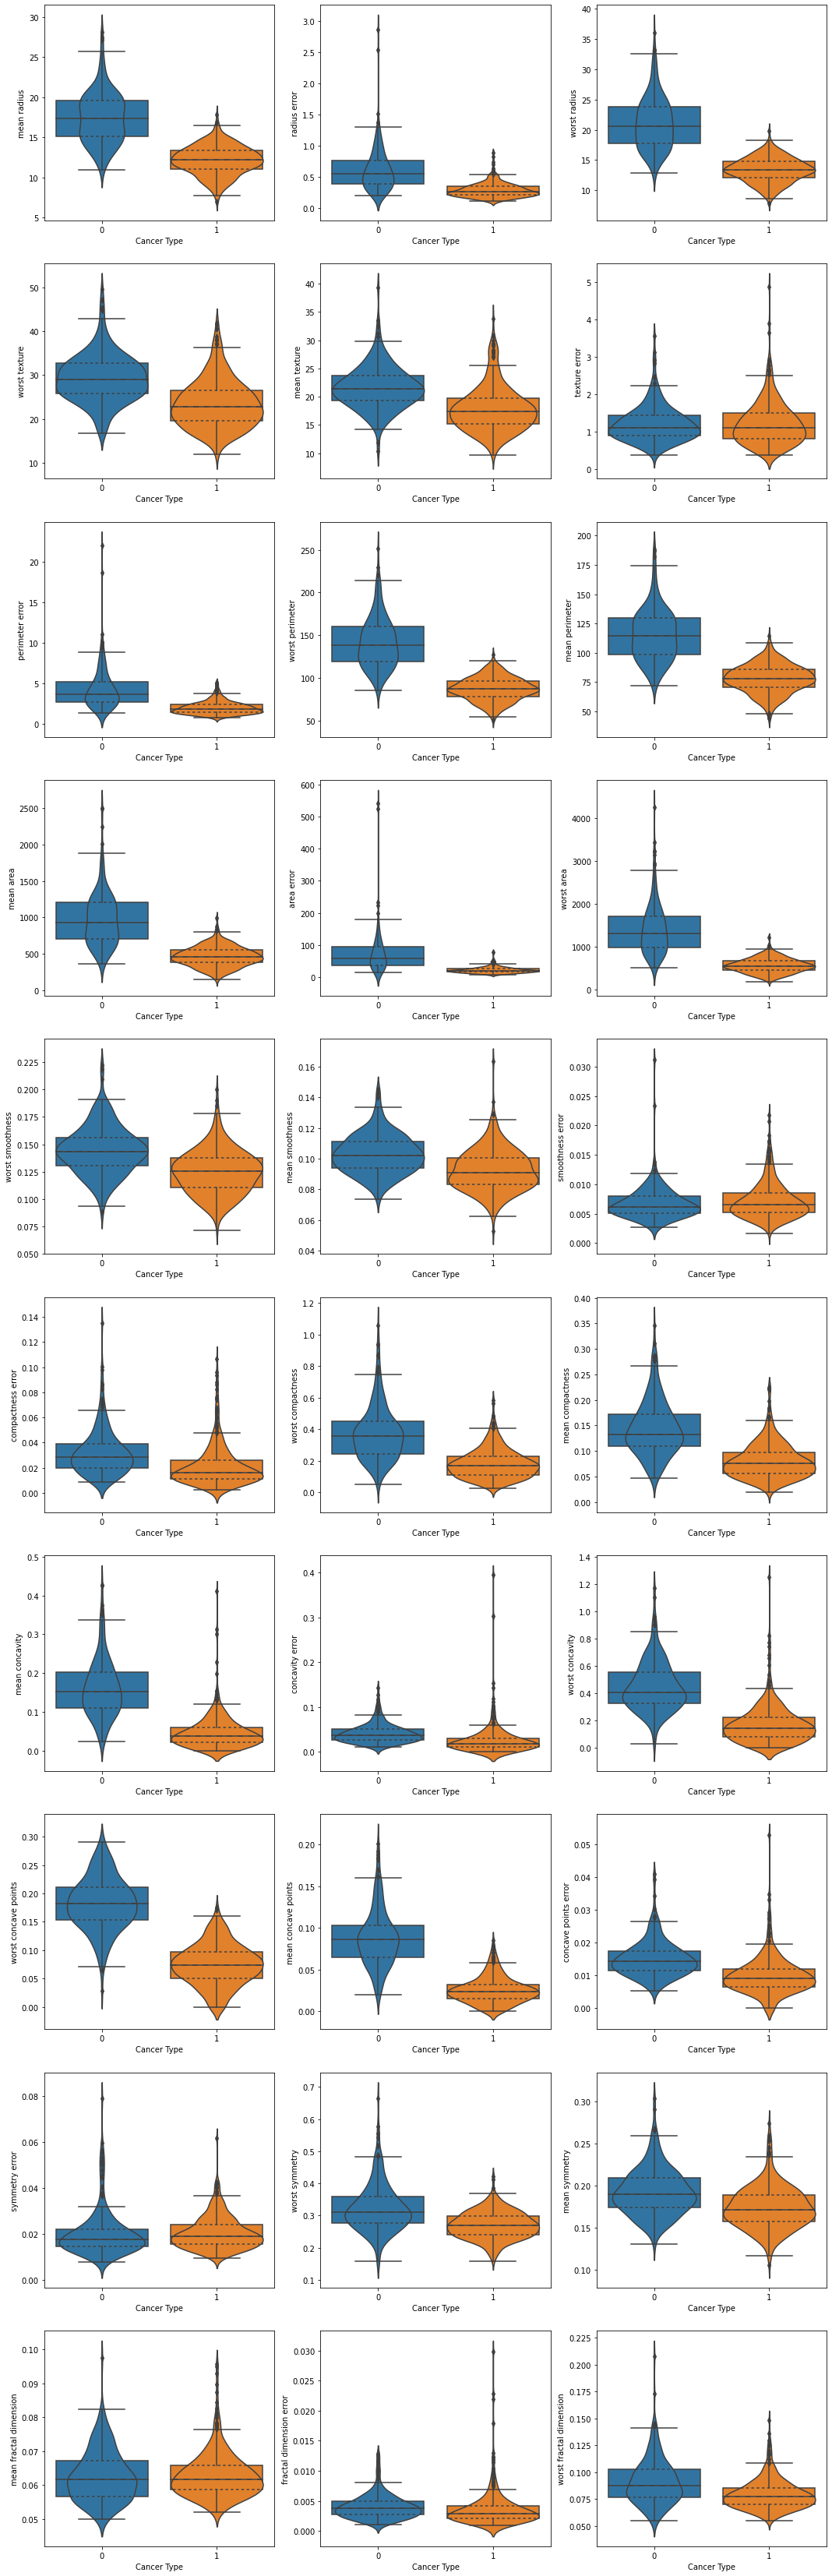

In [11]:
from itertools import zip_longest
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(10, 3)
fig.set_figheight(60)
fig.set_figwidth(18)

target_title = "Cancer Type"

for index, feature_name in enumerate(data["feature_names"]):
    df = pd.DataFrame(zip_longest(X[feature_name].values, y), columns=[feature_name, target_title])
    ax = sns.violinplot(x=target_title, y=feature_name, data=df, inner="quartile", ax=axs[index % 10, index % 3])
    ax = sns.boxplot(x=target_title, y=feature_name, data=df, ax=axs[index % 10, index % 3])

From the above, we can see features such as `texture error`, `smoothness error`, `symmetry error`, `symmetry error`, `mean fractal dimension`, `fractal dimension error` have a seemingly high entropy. These features may create noise in our classification, and depending on one's discretion, these features can be dropped for the classification.

<!-- Finding the outliers, -->

Determining the dataset distribution of classes,

In [12]:
pd.DataFrame([[0, y[y == 0].count()], [1, y[y == 1].count()]], columns=["Class", "Count"])

,Class,Count
0,0,212
1,1,357


All-in-all, the description of the data is summarised as follows,

In [13]:
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Identifying the algorithm

After exploring our data, let's split our data into training and test datasets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then scale our dataset

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.transform(X)

Now, given our dataset we need to consider the following algorithms that have been covered so far,

1. Naive Bayes Classifier
2. Logistic Regression
3. Linear Regression
4. Decision Trees

From the above list, we would drop **Linear Regression** as one of our consideration to solve our problem, as it is not a supervised classification algorithm.

### Why not Linear Regression then?

Linear Regression (**1**) deals with and returns continous values, and classification problems requires output discrete values (e.g. target classes `0` or `1`). (**2**) Additionally, the threshold would have to be continously updated when new data points are added, making it inefficient for classification.

Below is an example of why Linear Regression should not be used for classification problems.

Let's train our dataset on a Linear Regression model.

**1**: Fit the model with the dataset

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**2**: Make predictions on both the training and test dataset

In [17]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

**3a**: Let's use the training dataset to determine a threshold based on the range of values. We can visualize them using the first feature to plot on the 2D graph. Notice how our actual dataset (**blue**) compares with the predicted dataset (**red**) for the first feature.

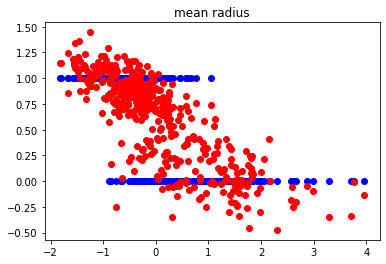

In [18]:
plt.scatter(X_train[:,0], y_train, color="blue")
plt.scatter(X_train[:,0], y_train_predicted, color="red")
plt.title(data["feature_names"][0])
plt.show()

In [19]:
(y_train_predicted.min(), y_train_predicted.max())

(-0.474308843483525, 1.4468541843585139)

Given the above data range, suppose that the data is balanced for illustration, we can assume a threshold in the middle such as

In [20]:
(y_train_predicted.max() + y_train_predicted.min()) / 2

0.48627267043749445

**3b**: Applying the same for the test dataset,

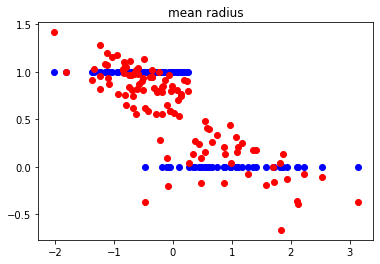

In [21]:
plt.scatter(X_test[:,0], y_test, color="blue")
plt.scatter(X_test[:,0], y_test_predicted, color="red")
plt.title(data["feature_names"][0])
plt.show()

In [22]:
(y_test_predicted.min(), y_test_predicted.max())

(-0.6630371314835355, 1.4161541444946169)

In [23]:
(y_test_predicted.max() + y_test_predicted.min()) / 2

0.3765585065055407

Notice that with the change of the range of values due to different datasets, it requires us to update our threshold again. Imagine if the threshold was configured based on the test's dataset range, this would fail since the training's dataset range is higher.

**Conclusion**: Our observation tells us that the model outputs a value beyond the range of our expected values (of classifying into `0` and `1`), and this range also increases as larger $X$ data points are added given its nature of predicting continuous values. The threshold applied in our training data used to fit our model could not be a good classifier for our new test data points into the relevant binary classes. Clearly, Linear Regression is not suitable for dealing with classification problems as this range would continue to grow, making it much more difficult to determine a suitable threshold.

**Solution**: The solution to the above problem is to use the **Logistic Regression** algorithm as it classification counterpart. It is an extension of the **Linear Regression** algorithm, and the reason why it would work is because it utilises the softmax or sigmoid function to output a predicted value from ranges of `0` to `1` regardless of the values range. The thresholds are set according to the number of classes (e.g. `4` classes would split the `0` to `1` range into these thresholds: `[0.25, 0.5, 0.75]`). It would also return outputs of the classified class such as `1` or `0`.

### Using supervised classification algorithms

This leaves us with the following algorithms that suits our original problem as we need a supervised classification algorithm for binary classes,

1. Naive Bayes Classifier
2. Logistic Regression
3. Decision Trees

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from matplotlib.colors import ListedColormap
import numpy as np

def display_contour(model_cls):
    y_predicted = model_cls.predict(X_test)

    # Seperate into their target classes
    points_correct = {
        0: {"feature_0": [], "feature_1": []}, 
        1: {"feature_0": [], "feature_1": []}
    }
    points_incorrect = {
        0: {"feature_0": [], "feature_1": []}, 
        1: {"feature_0": [], "feature_1": []}
    }

    # Display for the first 2 features
    for index, row in enumerate(X_test):
        if y_predicted[index] == y_test.iloc[index]:
            points_correct[y_test.iloc[index]]["feature_0"].append(row[0])
            points_correct[y_test.iloc[index]]["feature_1"].append(row[1])

        else:
            points_incorrect[y_predicted[index]]["feature_0"].append(row[0])
            points_incorrect[y_predicted[index]]["feature_1"].append(row[1])

    # Display the correct data points
    plt.scatter(points_correct[0]["feature_0"], points_correct[0]["feature_1"], color="red", label="Correct Target = 0")
    plt.scatter(points_correct[1]["feature_0"], points_correct[1]["feature_1"], color="green", label="Correct Target = 1")
    
    # Display the incorrect data points
    plt.scatter(points_incorrect[0]["feature_0"], points_incorrect[0]["feature_1"], color="pink", edgecolor="black", label="Incorrect Target = 0")
    plt.scatter(points_incorrect[1]["feature_0"], points_incorrect[1]["feature_1"], color="lightgreen", edgecolor="black", label="Incorrect Target = 1")

    plt.xlabel(data["feature_names"][0])
    plt.ylabel(data["feature_names"][1])
    plt.legend()
    plt.show()

Using the **Naive Bayes Classifier** algorithm for classification,

In [25]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
scores_nb = cross_val_score(model_nb, X_train, y_train, cv=4)

Using the **Logistic Regression** algorithm for classification,

In [26]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=100)
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=4)

Using the **Decision Trees** algorithm for classification,

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy')
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=4)

Display the results of the scores

In [28]:
pd.DataFrame([
    [algo_name] + list(scores) + [scores.mean(), scores.std()] for algo_name, scores in [
        ("Naive Bayes", scores_nb),
        ("Logistic Regression", scores_lr),
        ("Decision Trees", scores_dt)
    ]
], columns=["Algorithm"] + [f"Run {i + 1}" for i, _ in enumerate(scores_nb)] + ["Average Score", "S.D of Score"])

,Algorithm,Run 1,Run 2,Run 3,Run 4,Average Score,S.D of Score
0,Naive Bayes,0.912281,0.964912,0.929825,0.929204,0.934055,0.019155
1,Logistic Regression,0.982456,0.973684,0.991228,0.946903,0.973568,0.016598
2,Decision Trees,0.956140,0.929825,0.929825,0.920354,0.934036,0.013335


Based on this result, the **Logistic Regression** is the better algorithm given that it has the highest average score and the lowest standard deviation, indicating a more consistent score.

We can take a look at the accuracy scores to get a better sense of the algorithms' accuracy.

For **Naive Bayes**, the accuracy score is as follows,

In [29]:
model_nb.fit(X_train, y_train)
y_test_predicted = model_nb.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_test_predicted), columns=['Predicted (Target=0)', 'Predicted (Target=1)'], index=['Actual (Target=0)', 'Actual (Target=1)'])

,Predicted (Target=0),Predicted (Target=1)
Actual (Target=0),40,3
Actual (Target=1),1,70


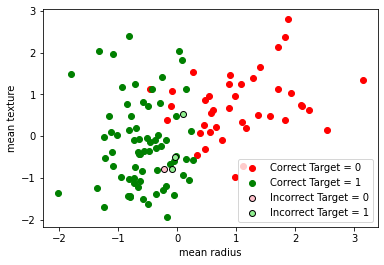

In [30]:
display_contour(model_nb)

In [31]:
accuracy_score(y_test, y_test_predicted)

0.9649122807017544

In [32]:
f1_score(y_test, y_test_predicted)

0.9722222222222222

For **Logistic Regression**, the accuracy score is as follows,

In [33]:
model_lr.fit(X_train, y_train)
y_test_predicted = model_lr.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_test_predicted), columns=['Predicted (Target=0)', 'Predicted (Target=1)'], index=['Actual (Target=0)', 'Actual (Target=1)'])

,Predicted (Target=0),Predicted (Target=1)
Actual (Target=0),41,2
Actual (Target=1),1,70


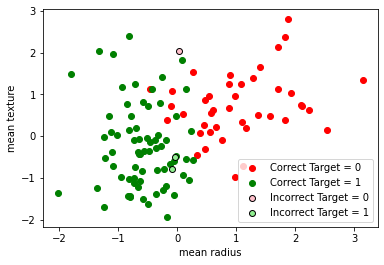

In [34]:
display_contour(model_lr)

In [35]:
accuracy_score(y_test, y_test_predicted)

0.9736842105263158

In [36]:
f1_score(y_test, y_test_predicted)

0.979020979020979

For **Decision Trees** algorithm, the accuracy score is as follows,

In [37]:
model_dt.fit(X_train, y_train)
y_test_predicted = model_dt.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_test_predicted), columns=['Predicted (Target=0)', 'Predicted (Target=1)'], index=['Actual (Target=0)', 'Actual (Target=1)'])

,Predicted (Target=0),Predicted (Target=1)
Actual (Target=0),39,4
Actual (Target=1),1,70


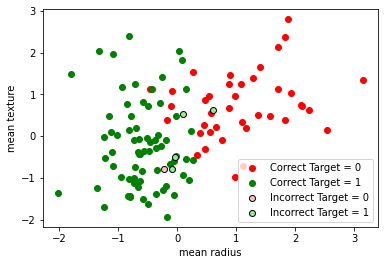

In [38]:
display_contour(model_dt)

In [39]:
accuracy_score(y_test, y_test_predicted)

0.956140350877193

In [40]:
f1_score(y_test, y_test_predicted)

0.9655172413793103

Based on the above accuracy score results, I would pick the **Logistic Regression** as the suitable algorithm for classifying the dataset.

# DONE -------------------------------------------------------